Your objective is to replicate these figures, created using the Center of Legislative Effectiveness Data. Thesefigures are similar to those we completed in the lecture videos.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("cel_volden_wiseman-_coursera.csv")

In [3]:
df

,thomas_num,thomas_name,icpsr,congress,year,st_name,cd,dem,elected,female,votepct,dwnom1,deleg_size,speaker,subchr,afam,latino,votepct_sq,power,chair,state_leg,state_leg_prof,majority,maj_leader,min_leader,meddist,majdist,all_bills,all_aic,all_abc,all_pass,all_law,les,seniority,benchmark,expectation,TotalInParty,RankInParty
0,1.0,"Abdnor, James",14000.0,93,1973,SD,2.0,0,1972,0,55.0,0.228,6.0,0,0,0,0,3025.0,0.0,0,1.0,0.104,0,0.0,0.0,0.2750,0.5475,22,0,0,0,0,0.109570,1,0.271341,1,197,132
1,2.0,"Abzug, Bella",13001.0,93,1973,NY,20.0,1,1970,1,56.0,-0.687,39.0,0,0,0,0,3136.0,0.0,0,0.0,0.000,1,0.0,0.0,0.6400,0.3675,136,1,1,1,1,0.762431,2,0.510812,2,248,119
2,3.0,"Adams, Brock",10700.0,93,1973,WA,7.0,1,1964,0,85.0,-0.361,7.0,0,1,0,0,7225.0,0.0,0,0.0,0.000,1,0.0,0.0,0.3140,0.0415,37,2,2,2,1,1.236478,5,1.530341,2,248,88
3,4.0,"Addabbo, Joseph",10500.0,93,1973,NY,7.0,1,1960,0,75.0,-0.400,39.0,0,1,0,0,5625.0,1.0,0,0.0,0.000,1,0.0,0.0,0.3530,0.0805,38,0,0,0,0,0.155052,7,1.584493,1,248,197
4,6.0,"Alexander, Bill",12000.0,93,1973,AR,1.0,1,1968,0,100.0,-0.281,4.0,0,1,0,0,10000.0,0.0,0,0.0,0.000,1,0.0,0.0,0.2340,0.0385,53,3,3,2,1,1.875051,3,1.476190,2,248,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10257,10250.0,"Yoder, Kevin",21135.0,115,2017,KS,3.0,0,2010,0,51.0,0.558,4.0,0,1,0,0,2601.0,1.0,0,1.0,0.152,1,0.0,0.0,0.2855,0.0600,7,1,5,2,0,0.769439,4,1.357554,2,245,166
10258,10251.0,"Yoho, Ted",21317.0,115,2017,FL,3.0,0,2012,0,57.0,0.698,27.0,0,1,0,0,3249.0,0.0,0,0.0,0.000,1,0.0,0.0,0.4255,0.2000,20,6,6,6,1,1.557216,3,1.343342,2,245,82
10259,10252.0,"Young, David",21521.0,115,2017,IA,3.0,0,2014,0,54.0,0.442,4.0,0,0,0,0,2916.0,1.0,0,0.0,0.000,1,0.0,0.0,0.1695,0.0560,17,2,4,4,1,1.403600,2,1.113775,2,245,91
10260,10253.0,"Young, Don",14066.0,115,2017,AK,1.0,0,1973,0,51.0,0.279,1.0,0,0,0,0,2601.0,0.0,0,1.0,0.320,1,0.0,0.0,0.0065,0.2190,62,19,14,8,5,5.935343,23,1.412227,3,245,1


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10262 entries, 0 to 10261
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   thomas_num      10262 non-null  float64
 1   thomas_name     10262 non-null  object 
 2   icpsr           10140 non-null  float64
 3   congress        10262 non-null  int64  
 4   year            10262 non-null  int64  
 5   st_name         10262 non-null  object 
 6   cd              10256 non-null  float64
 7   dem             10262 non-null  int64  
 8   elected         10262 non-null  int64  
 9   female          10262 non-null  int64  
 10  votepct         9899 non-null   float64
 11  dwnom1          10092 non-null  float64
 12  deleg_size      10261 non-null  float64
 13  speaker         10262 non-null  int64  
 14  subchr          10262 non-null  int64  
 15  afam            10262 non-null  int64  
 16  latino          10262 non-null  int64  
 17  votepct_sq      9894 non-null  

In [5]:
df.describe()

,thomas_num,icpsr,congress,year,cd,dem,elected,female,votepct,dwnom1,deleg_size,speaker,subchr,afam,latino,votepct_sq,power,chair,state_leg,state_leg_prof,majority,maj_leader,min_leader,meddist,majdist,all_bills,all_aic,all_abc,all_pass,all_law,les,seniority,benchmark,expectation,TotalInParty,RankInParty
count,10262.000000,10140.000000,10262.000000,10262.000000,10256.000000,10262.000000,10262.000000,10262.000000,9899.000000,10092.000000,10261.000000,10262.000000,10262.000000,10262.000000,10262.000000,9894.000000,10261.000000,10262.000000,10260.000000,10146.000000,10262.000000,10261.000000,10261.000000,1.008800e+04,10088.000000,10262.000000,10262.000000,10262.000000,10262.000000,10262.000000,10262.000000,10262.000000,10262.000000,10262.000000,10262.000000,10262.000000
mean,5128.451618,19005.693787,104.020269,1995.040538,9.739860,0.545605,1985.557981,0.109920,68.081220,0.013884,18.486600,0.002339,0.241961,0.072793,0.042195,4823.384880,0.247052,0.049406,0.491131,0.144792,0.566166,0.018517,0.020271,3.777023e-01,0.416515,16.776749,2.201520,1.838823,1.466283,0.694407,1.000097,5.281134,1.000071,1.846034,228.984993,114.979828
std,2960.034117,8817.353695,6.631514,13.263028,9.850338,0.497940,15.180707,0.312805,13.708784,0.437431,14.342121,0.048306,0.428291,0.259809,0.201042,2050.070404,0.431318,0.216724,0.499946,0.181876,0.495627,0.134817,0.140932,2.502039e-01,0.365398,17.469434,3.291735,2.897990,2.350901,1.327028,1.536281,4.113011,1.010043,0.765875,38.462014,69.727610
min,1.000000,226.000000,93.000000,1973.000000,0.000000,0.000000,1928.000000,0.000000,23.000000,-0.916000,1.000000,0.000000,0.000000,0.000000,0.000000,529.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.190000e-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.043188,1.000000,0.000000,0.000000
25%,2565.250000,14264.000000,98.000000,1983.000000,3.000000,0.000000,1974.000000,0.000000,58.000000,-0.375000,8.000000,0.000000,0.000000,0.000000,0.000000,3364.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.808750e-01,0.099000,7.000000,0.000000,0.000000,0.000000,0.000000,0.159817,2.000000,0.391002,1.000000,204.000000,56.000000
50%,5127.500000,15150.000000,104.000000,1995.000000,6.000000,1.000000,1986.000000,0.000000,65.000000,-0.086000,13.000000,0.000000,0.000000,0.000000,0.000000,4225.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.370000e-01,0.262000,12.000000,1.000000,1.000000,1.000000,0.000000,0.467848,4.000000,0.622633,2.000000,230.000000,112.000000
75%,7691.750000,21527.250000,110.000000,2007.000000,13.000000,1.000000,1996.000000,0.000000,74.000000,0.405000,25.000000,0.000000,0.000000,0.000000,0.000000,5476.000000,0.000000,0.000000,1.000000,0.249000,1.000000,0.000000,0.000000,5.450000e-01,0.734250,21.000000,3.000000,2.000000,2.000000,1.000000,1.190921,7.000000,1.363713,2.000000,261.000000,169.000000
max,10254.000000,99342.000000,115.000000,2017.000000,53.000000,1.000000,2018.000000,1.000000,100.000000,1.633000,53.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,0.659000,1.000000,1.000000,1.000000,1.680000e+00,1.952500,258.000000,37.000000,37.000000,33.000000,22.000000,18.686390,30.000000,7.284299,3.000000,296.000000,296.000000


In [6]:
df.columns

Index(['thomas_num', 'thomas_name', 'icpsr', 'congress', 'year', 'st_name', 'cd', 'dem', 'elected', 'female', 'votepct', 'dwnom1', 'deleg_size', 'speaker', 'subchr', 'afam', 'latino', 'votepct_sq', 'power', 'chair', 'state_leg', 'state_leg_prof', 'majority', 'maj_leader', 'min_leader', 'meddist', 'majdist', 'all_bills', 'all_aic', 'all_abc', 'all_pass', 'all_law', 'les', 'seniority', 'benchmark', 'expectation', 'TotalInParty', 'RankInParty'], dtype='object')

In [7]:
congress115 = df[df["congress"] == 115]

In [8]:
congress115

,thomas_num,thomas_name,icpsr,congress,year,st_name,cd,dem,elected,female,votepct,dwnom1,deleg_size,speaker,subchr,afam,latino,votepct_sq,power,chair,state_leg,state_leg_prof,majority,maj_leader,min_leader,meddist,majdist,all_bills,all_aic,all_abc,all_pass,all_law,les,seniority,benchmark,expectation,TotalInParty,RankInParty
9814,9807.0,"Abraham, Ralph",21522.0,115,2017,LA,5.0,0,2014,0,82.0,0.508,6.0,0,1,0,0,6724.0,0.0,0,0.0,0.000,1,0.0,0.0,0.2355,0.010,9,2,2,1,0,0.493490,2,1.329130,1,245,200
9815,9808.0,"Adams, Alma",21545.0,115,2017,NC,12.0,1,2014,1,67.0,-0.469,13.0,0,0,1,0,4489.0,0.0,0,1.0,0.203,0,0.0,0.0,0.7415,0.967,16,1,2,2,0,0.587624,3,0.537361,2,203,87
9816,9809.0,"Aderholt, Robert",29701.0,115,2017,AL,4.0,0,1996,0,100.0,0.361,7.0,0,1,0,0,10000.0,1.0,0,0.0,0.000,1,0.0,0.0,0.0885,0.137,2,0,2,0,0,0.159878,11,1.457038,1,245,235
9817,9810.0,"Aguilar, Pete",21506.0,115,2017,CA,31.0,1,2014,0,56.0,-0.285,53.0,0,0,0,1,3136.0,1.0,0,0.0,0.000,0,0.0,0.0,0.5575,0.783,11,3,3,3,1,0.730930,2,0.523149,2,203,66
9818,9811.0,"Allen, Rick",21516.0,115,2017,GA,12.0,0,2014,0,62.0,0.611,14.0,0,0,0,0,3844.0,0.0,0,0.0,0.000,1,0.0,0.0,0.3385,0.113,4,0,1,1,1,0.152447,2,1.113775,1,245,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10257,10250.0,"Yoder, Kevin",21135.0,115,2017,KS,3.0,0,2010,0,51.0,0.558,4.0,0,1,0,0,2601.0,1.0,0,1.0,0.152,1,0.0,0.0,0.2855,0.060,7,1,5,2,0,0.769439,4,1.357554,2,245,166
10258,10251.0,"Yoho, Ted",21317.0,115,2017,FL,3.0,0,2012,0,57.0,0.698,27.0,0,1,0,0,3249.0,0.0,0,0.0,0.000,1,0.0,0.0,0.4255,0.200,20,6,6,6,1,1.557216,3,1.343342,2,245,82
10259,10252.0,"Young, David",21521.0,115,2017,IA,3.0,0,2014,0,54.0,0.442,4.0,0,0,0,0,2916.0,1.0,0,0.0,0.000,1,0.0,0.0,0.1695,0.056,17,2,4,4,1,1.403600,2,1.113775,2,245,91
10260,10253.0,"Young, Don",14066.0,115,2017,AK,1.0,0,1973,0,51.0,0.279,1.0,0,0,0,0,2601.0,0.0,0,1.0,0.320,1,0.0,0.0,0.0065,0.219,62,19,14,8,5,5.935343,23,1.412227,3,245,1


### Exercise 1

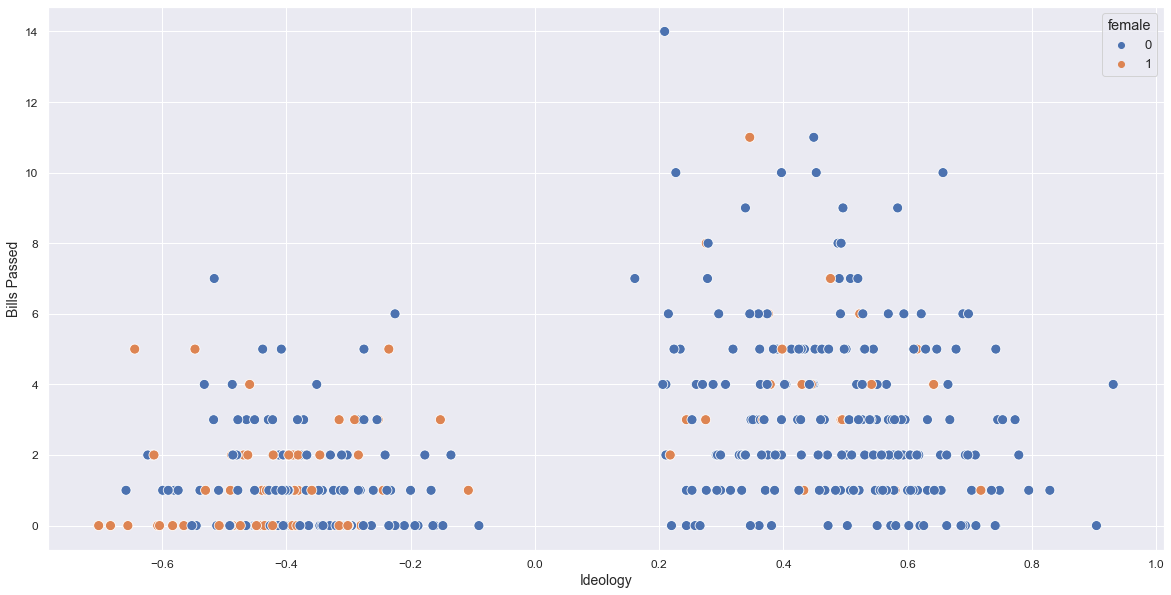

In [9]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,1,1)
plt.title("")
sns.scatterplot(x="dwnom1", y="all_pass", hue="female", data=congress115, s=100)
plt.xlabel("Ideology")
plt.ylabel("Bills Passed")
plt.show()

### Exercise 2

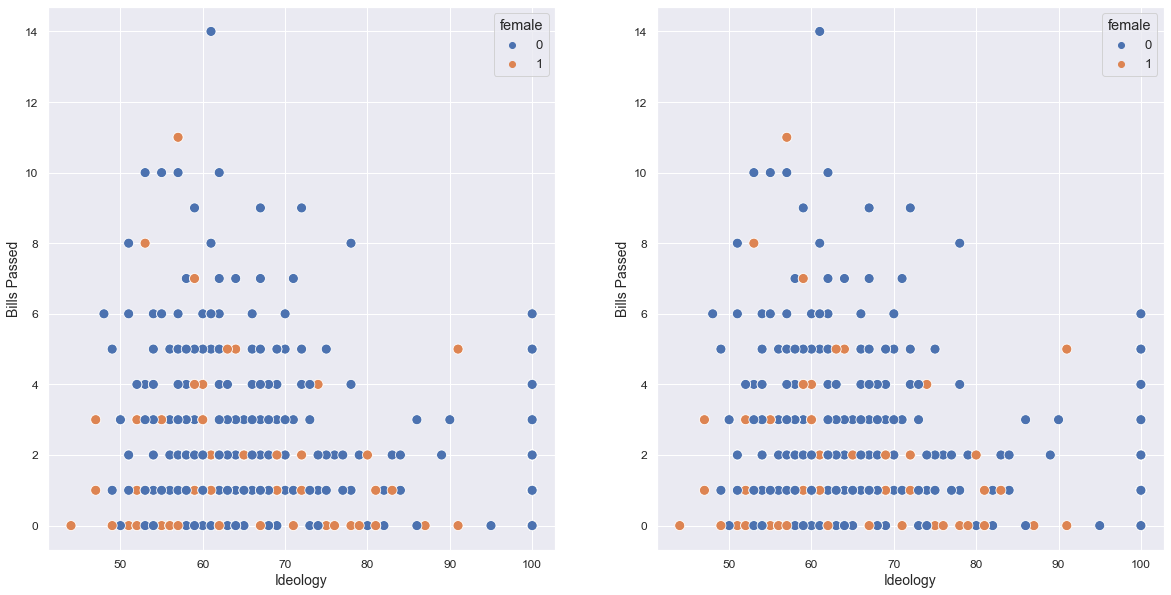

In [10]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title("")
plt.xlabel("Ideology")
plt.ylabel("Bills Passed")
sns.scatterplot(x="votepct", y="all_pass", hue="female", data=congress115, s=100)

plt.subplot(1,2,2)
plt.title("")
plt.xlabel("Ideology")
plt.ylabel("Bills Passed")
sns.scatterplot(x="votepct", y="all_pass", hue="female", data=congress115, s=100)

plt.show()

<Figure size 2880x720 with 0 Axes>

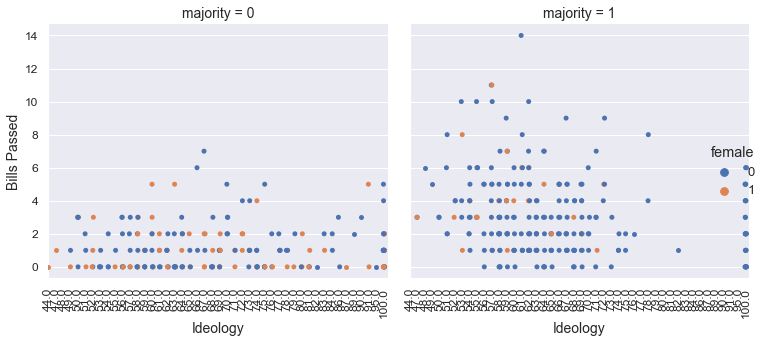

In [11]:
fig = plt.figure(figsize=(40,10))



g = sns.catplot(x='votepct', y='all_pass', hue = 'female', col = 'majority',
            kind='strip', data=congress115,  height = 5, aspect = 1)


g.set_xlabels("Ideology")
g.set_ylabels("Bills Passed")
g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)
#g.set_axis_labels("Ideology","Bills Passed")
#plt.title("Title")

plt.tight_layout()
plt.show(g)

### Problem 3

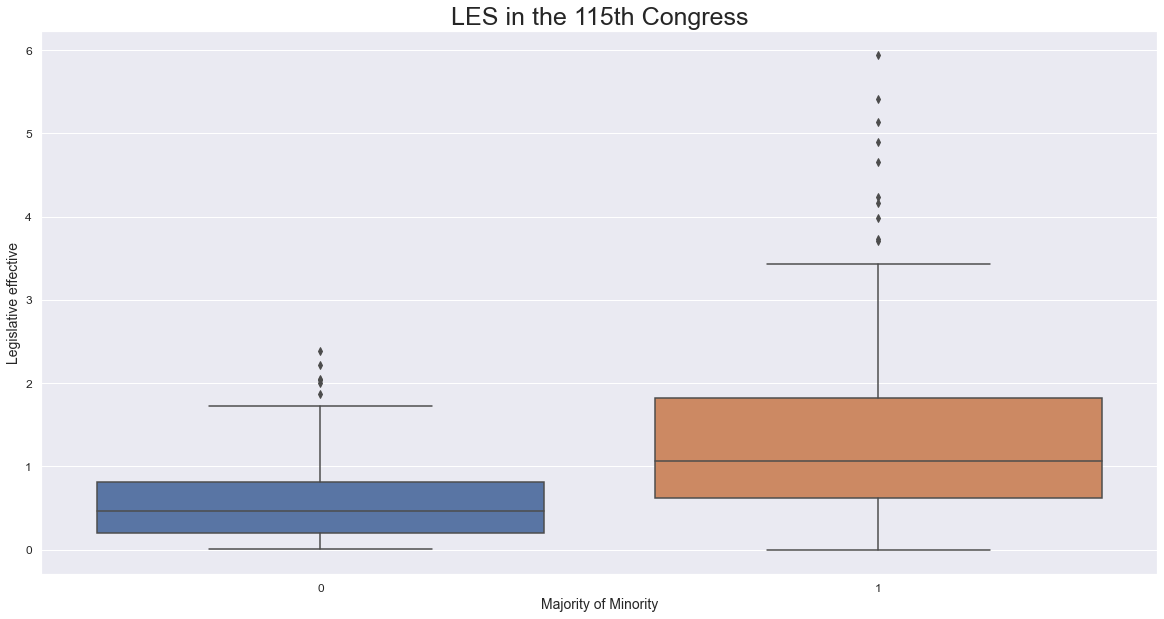

In [12]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,1,1)
plt.title("LES in the 115th Congress" , fontsize=25)
sns.boxplot(x="majority", y="les", data=congress115)
plt.xlabel("Majority of Minority")
plt.ylabel("Legislative effective")
plt.show()